- 군집화 - Wine data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)

pca = PCA(2)
wine_pca = pca.fit_transform(wine_std)

- 군집화

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=2023, n_init='warn')
kmeans.fit(wine_std)

KMeans(n_clusters=3, random_state=2023)

In [5]:
df = pd.DataFrame(wine_pca, columns=['PC1', 'PC2'])
df['target'] = wine.target
df['cluster'] = kmeans.labels_
df.tail()

,PC1,PC2,target,cluster
173,-3.370524,-2.216289,2,1
174,-2.601956,-1.757229,2,1
175,-2.677839,-2.760899,2,1
176,-2.387017,-2.297347,2,1
177,-3.208758,-2.768920,2,1


In [6]:
# 데이터 분포
df.groupby(['target', 'cluster'])[['PC1']].count()

PC1
target cluster     
0      0         59
1      0          3
       1          3
       2         65
2      1         48

In [7]:
kmeans.cluster_centers_

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

- 시각화

NameError: name 'iris' is not defined

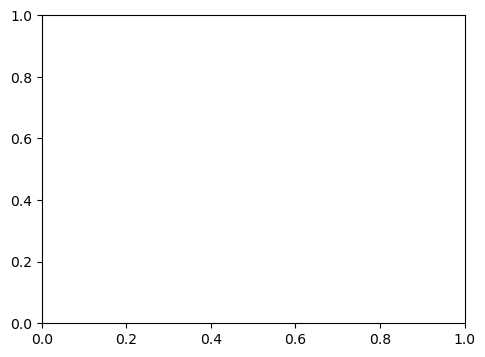

In [8]:
markers = ['^','s','o']
plt.figure(figsize=(12,4))
for k, column in enumerate(['target','cluster']):
    plt.subplot(1, 2, k+1)
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if column == 'target':
            plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])
        else:
            plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
            plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='red', s=100)
    plt.legend()
    plt.xlabel('PC1'), plt.ylabel('PC2')
    title = 'Original Data' if column=='target' else '3 Clustering result'
    plt.title(title)
plt.show()